In [1]:
import numpy as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("DamianLillard.csv")
data

,Year,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,22,POR,NBA,PG,82,82,38.6,6.7,15.7,...,0.844,0.5,2.6,3.1,6.5,0.9,0.2,3.0,2.1,19.0
1,2,23,POR,NBA,PG,82,82,35.8,6.7,15.9,...,0.871,0.4,3.1,3.5,5.6,0.8,0.3,2.4,2.4,20.7
2,3,24,POR,NBA,PG,82,82,35.7,7.2,16.6,...,0.864,0.6,4.0,4.6,6.2,1.2,0.3,2.7,2.0,21.0
3,4,25,POR,NBA,PG,75,75,35.7,8.2,19.7,...,0.892,0.6,3.4,4.0,6.8,0.9,0.4,3.2,2.2,25.1
4,5,26,POR,NBA,PG,75,75,35.9,8.8,19.8,...,0.895,0.6,4.3,4.9,5.9,0.9,0.3,2.6,2.0,27.0
5,6,27,POR,NBA,PG,73,73,36.6,8.5,19.4,...,0.916,0.8,3.6,4.5,6.6,1.1,0.4,2.8,1.6,26.9
6,7,28,POR,NBA,PG,80,80,35.5,8.5,19.2,...,0.912,0.9,3.8,4.6,6.9,1.1,0.4,2.7,1.9,25.8
7,8,29,POR,NBA,PG,66,66,37.5,9.5,20.4,...,0.888,0.5,3.8,4.3,8.0,1.1,0.3,2.9,1.7,30.0
8,9,30,POR,NBA,PG,67,67,35.8,9.0,19.9,...,0.928,0.5,3.7,4.2,7.5,0.9,0.3,3.0,1.5,28.8
9,10,31,POR,NBA,PG,29,29,36.4,7.7,19.0,...,0.878,0.4,3.7,4.1,7.3,0.6,0.4,2.9,1.3,24.0


In [3]:
stats = data.drop(['Tm','Lg','Pos','G','GS','MP','FG','FGA','3P','3PA','2P','2PA','2P%','FT','FTA','ORB','DRB','FG%','3P%','FT%'], axis=1)
stats

,Year,Age,eFG%,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,22,0.501,3.1,6.5,0.9,0.2,3.0,2.1,19.0
1,2,23,0.508,3.5,5.6,0.8,0.3,2.4,2.4,20.7
2,3,24,0.506,4.6,6.2,1.2,0.3,2.7,2.0,21.0
3,4,25,0.497,4.0,6.8,0.9,0.4,3.2,2.2,25.1
4,5,26,0.516,4.9,5.9,0.9,0.3,2.6,2.0,27.0
5,6,27,0.519,4.5,6.6,1.1,0.4,2.8,1.6,26.9
6,7,28,0.522,4.6,6.9,1.1,0.4,2.7,1.9,25.8
7,8,29,0.563,4.3,8.0,1.1,0.3,2.9,1.7,30.0
8,9,30,0.554,4.2,7.5,0.9,0.3,3.0,1.5,28.8
9,10,31,0.486,4.1,7.3,0.6,0.4,2.9,1.3,24.0


In [4]:
feature_names = ['Year','Age']

In [5]:
X = stats[feature_names]
Y = stats['PTS']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
linear_regression_model = LinearRegression()

In [9]:
linear_regression_model.fit(X_train,Y_train)

LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error
Y_pred_test = linear_regression_model.predict(X_test)
error_metric = mean_squared_error(y_pred=Y_pred_test, y_true=Y_test)
print('The Mean Square Error of this model is: ', error_metric)

The Mean Square Error of this model is:  18.83768553949359


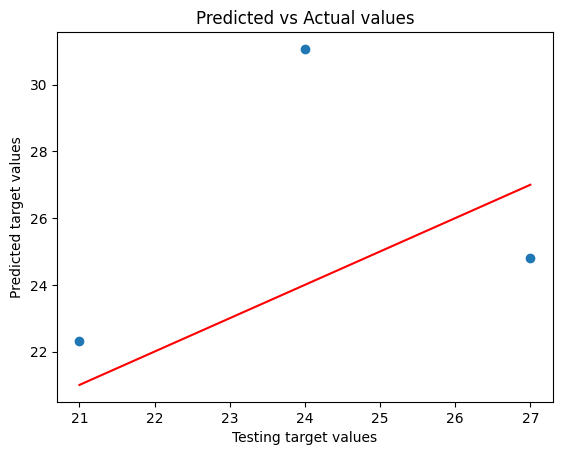

In [11]:
fig, ax = plt.subplots()
ax.scatter(Y_test,Y_pred_test)
ax.plot(Y_test,Y_test, color = 'red')
ax.set_xlabel('Testing target values')
ax.set_ylabel('Predicted target values')
ax.set_title('Predicted vs Actual values');

In [12]:
from collections import OrderedDict

In [13]:
new_data = OrderedDict([
    ('Year', 12),
    ('Age', 33)]
                      )

new_data = pd.Series(new_data).values.reshape(1,-1)
ppg = linear_regression_model.predict(new_data)
print(ppg)

[33.57678571]


C:\Users\jchen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
A = stats[feature_names]
B = stats['AST']

In [15]:
A_train, A_test, B_train, B_test = train_test_split(A,B, test_size=0.2, random_state=0)

In [16]:
linear_regression_model_ast = LinearRegression()

In [17]:
linear_regression_model_ast.fit(A_train,B_train)

LinearRegression()

In [18]:
new_data = OrderedDict([
    ('Year', 12),
    ('Age', 33)]
                      )

new_data = pd.Series(new_data).values.reshape(1,-1)
apg = linear_regression_model_ast.predict(new_data)
print(apg)

[7.85714286]


C:\Users\jchen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
C = stats[feature_names]
D = stats['TRB']

In [20]:
C_train, C_test, D_train, D_test = train_test_split(C,D, test_size=0.2, random_state=0)

In [21]:
linear_regression_model_trb = LinearRegression()

In [22]:
linear_regression_model_trb.fit(C_train,D_train)

LinearRegression()

In [23]:
new_data = OrderedDict([
    ('Year', 12),
    ('Age', 33)]
                      )

new_data = pd.Series(new_data).values.reshape(1,-1)
rpg = linear_regression_model_trb.predict(new_data)
print(rpg)

[5.00357143]


C:\Users\jchen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
E = stats[feature_names]
F = stats['STL']

In [25]:
E_train, E_test, F_train, F_test = train_test_split(E,F, test_size=0.2, random_state=0)

In [26]:
linear_regression_model_stl = LinearRegression()

In [27]:
linear_regression_model_stl.fit(E_train,F_train)

LinearRegression()

In [28]:
new_data = OrderedDict([
    ('Year', 12),
    ('Age', 33)]
                      )

new_data = pd.Series(new_data).values.reshape(1,-1)
stl = linear_regression_model_stl.predict(new_data)
print(stl)

[1.03392857]


C:\Users\jchen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
G = stats[feature_names]
H = stats['BLK']

In [30]:
G_train, G_test, H_train, H_test = train_test_split(G,H, test_size=0.2, random_state=0)

In [31]:
linear_regression_model_blk = LinearRegression()

In [32]:
linear_regression_model_blk.fit(G_train,H_train)

LinearRegression()

In [33]:
new_data = OrderedDict([
    ('Year', 12),
    ('Age', 33)]
                      )

new_data = pd.Series(new_data).values.reshape(1,-1)
blk = linear_regression_model_blk.predict(new_data)
print(blk)

[0.35357143]


C:\Users\jchen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
I = stats[feature_names]
J = stats['TOV']

In [35]:
I_train, I_test, J_train, J_test = train_test_split(I,J, test_size=0.2, random_state=0)

In [36]:
linear_regression_model_tov = LinearRegression()

In [37]:
linear_regression_model_tov.fit(I_train, J_train)

LinearRegression()

In [38]:
new_data = OrderedDict([
    ('Year', 12),
    ('Age', 33)]
                      )

new_data = pd.Series(new_data).values.reshape(1,-1)
tov = linear_regression_model_tov.predict(new_data)
print(tov)

[3.12678571]


C:\Users\jchen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
K = stats[feature_names]
L = stats['PF']

In [45]:
K_train, K_test, L_train, L_test = train_test_split(K,L, test_size=0.2, random_state=0)

In [46]:
linear_regression_model_pf = LinearRegression()

In [47]:
linear_regression_model_pf.fit(K_train, L_train)

LinearRegression()

In [48]:
new_data = OrderedDict([
    ('Year', 12),
    ('Age', 33)]
                      )

new_data = pd.Series(new_data).values.reshape(1,-1)
pf = linear_regression_model_pf.predict(new_data)
print(pf)

[1.54107143]


C:\Users\jchen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
M = stats[feature_names]
N = stats['eFG%']

In [50]:
M_train, M_test, N_train, N_test = train_test_split(M,N, test_size=0.2, random_state=0)

In [51]:
linear_regression_model_efg = LinearRegression()

In [52]:
linear_regression_model_efg.fit(M_train, N_train)

LinearRegression()

In [53]:
new_data = OrderedDict([
    ('Year', 12),
    ('Age', 33)]
                      )

new_data = pd.Series(new_data).values.reshape(1,-1)
efg = linear_regression_model_efg.predict(new_data)
print(efg)

[0.57128571]


C:\Users\jchen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
predicted_data = [[12, 33, ppg, rpg, apg, stl, blk, tov, pf, efg]]

In [57]:
predicted_df = pd.DataFrame(predicted_data, columns=['Year', 'Age', 'Predicted PPG', 'Predicted RPG', 'Predicted APG', 'Predicted SPG', 'Predicted BPG', 'Predicted TOV', 'Predicted PF', 'Predicted eFG%'])
predicted_df

,Year,Age,Predicted PPG,Predicted RPG,Predicted APG,Predicted SPG,Predicted BPG,Predicted TOV,Predicted PF,Predicted eFG%
0,12,33,[33.57678571428572],[5.003571428571428],[7.857142857142856],[1.0339285714285715],[0.35357142857142854],[3.1267857142857145],[1.5410714285714286],[0.5712857142857142]


In [59]:
new_data = OrderedDict([
    ('Year', 10),
    ('Age', 31)]
                      )

new_data = pd.Series(new_data).values.reshape(1,-1)

test_ppg = linear_regression_model.predict(new_data)
print(test_ppg)
test_apg = linear_regression_model_ast.predict(new_data)
print(test_apg)
test_rpg = linear_regression_model_trb.predict(new_data)
print(test_rpg)
test_stl = linear_regression_model_stl.predict(new_data)
print(test_stl)
test_blk = linear_regression_model_blk.predict(new_data)
print(test_blk)
test_tov = linear_regression_model_tov.predict(new_data)
print(test_tov)
test_pf = linear_regression_model_pf.predict(new_data)
print(test_pf)
test_efg = linear_regression_model_efg.predict(new_data)
print(test_efg)

[31.07202381]
[7.53809524]
[4.71071429]
[1.01011905]
[0.34404762]
[3.05535714]
[1.66488095]
[0.55702381]


C:\Users\jchen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\jchen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\jchen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\jchen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\jchen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Line

In [60]:
predicted_test_data = [[10, 31, test_ppg, test_rpg, test_apg, test_stl, test_blk, test_tov, test_pf, test_efg]]
predicted_test_df = pd.DataFrame(predicted_test_data, columns=['Year', 'Age', 'Predicted PPG', 'Predicted RPG', 'Predicted APG', 'Predicted SPG', 'Predicted BPG', 'Predicted TOV', 'Predicted PF', 'Predicted eFG%'])
predicted_test_df

,Year,Age,Predicted PPG,Predicted RPG,Predicted APG,Predicted SPG,Predicted BPG,Predicted TOV,Predicted PF,Predicted eFG%
0,10,31,[31.072023809523813],[4.710714285714285],[7.538095238095238],[1.0101190476190476],[0.344047619047619],[3.055357142857143],[1.6648809523809525],[0.5570238095238095]


In [61]:
stats

,Year,Age,eFG%,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,22,0.501,3.1,6.5,0.9,0.2,3.0,2.1,19.0
1,2,23,0.508,3.5,5.6,0.8,0.3,2.4,2.4,20.7
2,3,24,0.506,4.6,6.2,1.2,0.3,2.7,2.0,21.0
3,4,25,0.497,4.0,6.8,0.9,0.4,3.2,2.2,25.1
4,5,26,0.516,4.9,5.9,0.9,0.3,2.6,2.0,27.0
5,6,27,0.519,4.5,6.6,1.1,0.4,2.8,1.6,26.9
6,7,28,0.522,4.6,6.9,1.1,0.4,2.7,1.9,25.8
7,8,29,0.563,4.3,8.0,1.1,0.3,2.9,1.7,30.0
8,9,30,0.554,4.2,7.5,0.9,0.3,3.0,1.5,28.8
9,10,31,0.486,4.1,7.3,0.6,0.4,2.9,1.3,24.0


In [63]:
predicted_df.to_csv('predictions.csv', index=False)